In [17]:
# Importing neccesary packages.

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

#

from scipy import interp
import math
from scipy.stats import norm
from scipy import stats

#

import warnings
warnings.filterwarnings('ignore') # Disabling warnimgs for clearer outputs
pd.options.display.max_columns = 50 # Pandas option to increase max number of columns to display
plt.style.use('ggplot') # Setting default plot style

In [18]:
v_train = pd.read_csv('../00 datasets/titanic_train.csv')
v_test = pd.read_csv('../00 datasets/titanic_test.csv')
idx = len(v_train)

In [19]:
#Checking train and test sets
display(v_train.sample(3))
display(v_test.sample(3))
# Checking merged shape
display(v_train.shape)
display(v_test.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
398,399,0,2,"Pain, Dr. Alfred",male,23.00,0,0,244278,10.5000,NaN,S
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
66,958,3,"Burns, Miss. Mary Delia",female,18.0,0,0,330963,7.8792,NaN,Q
57,949,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,F G63,S
375,1267,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C


(891, 12)

(418, 11)

In [20]:
# Merging visualization datasets.
v_train.drop('PassengerId', axis=1, inplace=True)
v_test.drop('PassengerId', axis=1, inplace=True)
v_merged = pd.concat([v_train, v_test], sort=False).reset_index(drop=True)

In [21]:
# Checking merged shape
display(v_merged.shape)

(1309, 11)

In [22]:
# Selecting categorical data for univariate analysis
cats = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


def plotFrequency(cats):
    #"A plot for visualize categorical data, showing both absolute and relative frequencies"
    fig, axes = plt.subplots(math.ceil(len(cats) / 3), 3, figsize=(20, 12))
    axes = axes.flatten()

    for ax, cat in zip(axes, cats):
        if cat == 'Survived':
            total = float(len(v_train[cat]))
        else:
            total = float(len(v_merged[cat]))
        sns.countplot(v_merged[cat], palette='plasma', ax=ax)

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 10,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha="center")

        plt.ylabel('Count', fontsize=15, weight='bold')

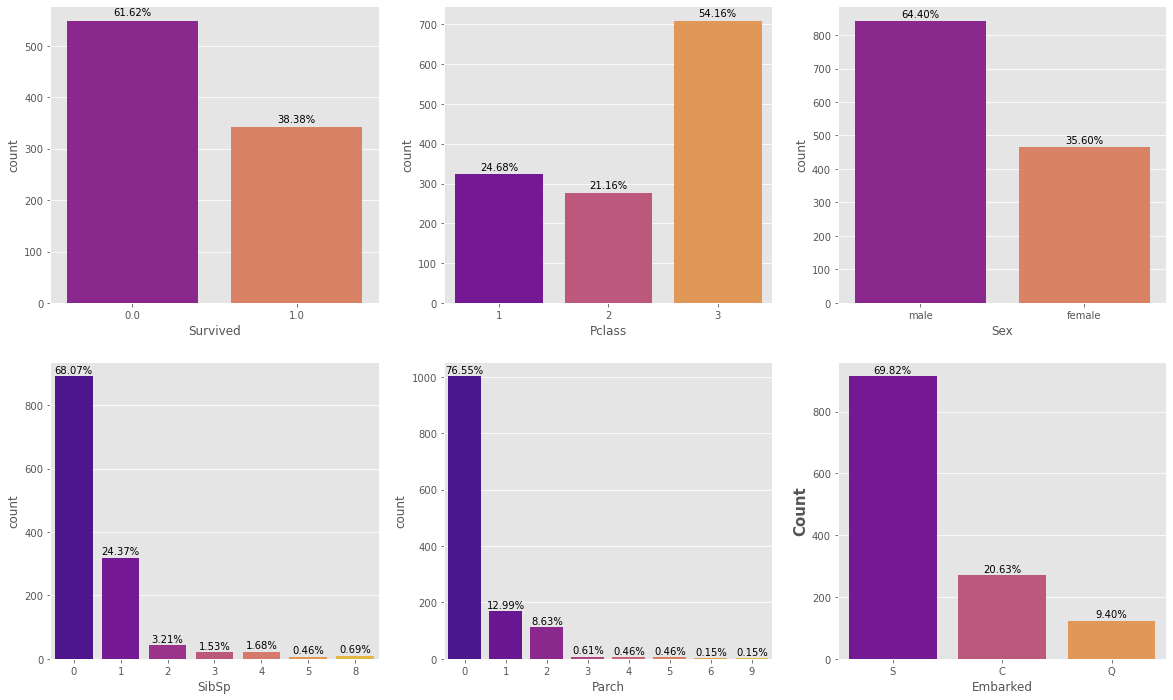

In [23]:
plotFrequency(cats)


    * Survived: Indicates that if particular passenger survived(1) or not(0)
    * Pclass: Shows classes for the passenger, 1 for first, 2 for second and 3 for third.
    * Sex: Indicates gender of the passenger. Might be crucial indicator for our model since historical records show women were first to save in ship accidents.
    * SibSp: The number of siblings and spouses on the ship, might be useful for extracting family ties.
    * Parch: The number of parents and children on the ship, migt have similar use with SibSp.
    * Embarked: Flag for the where the passenger embarked from, C for Cherbourg, Q for Queenstown, S for Southampton



    Sadly most of the train set passengers are not survived, around 62 percent.
    While having highest portion of the passengers on the ship, 3rd class also having highest casuality ratio. Meanwhile first class have more survival rate. So this kinda confirms our hypothesis that mustering orders from captain (1>2>3) might have effect on survival.
    Again most of the passengers on the ship are males(around two third of the passengers) they also have much higher ratio of casualities too. This confirms women part of the "Women and children first policy" had an effect in our Titanic case.
    Most of our passengers are travelling alone, they also have high casuality rate. So being married or with family has some positive effect on survival?
    Most of the passenger are embarked from Southampton. Survival rates differ between ports but I'm not sure if it's important observation or just random. We can relate this to families, groups to get something out of it or just use as it is.


In [24]:
def plotsurvival(cats, data):
    #"A plot for bivariate analysis"
    fig, axes = plt.subplots(math.ceil(len(cats) / 3), 3, figsize=(20, 12))
    axes = axes.flatten()

    for ax, cat in zip(axes, cats):
        if cat == 'Survived':
            sns.countplot(v_train[cat], palette='plasma', ax=ax)

        else:

            sns.countplot(x=cat,
                          data=data,
                          hue='Survived',
                          palette='plasma',
                          ax=ax)
            ax.legend(title='Survived?',
                      loc='upper right',
                      labels=['No', 'Yes'])

        plt.ylabel('Count', fontsize=15, weight='bold')

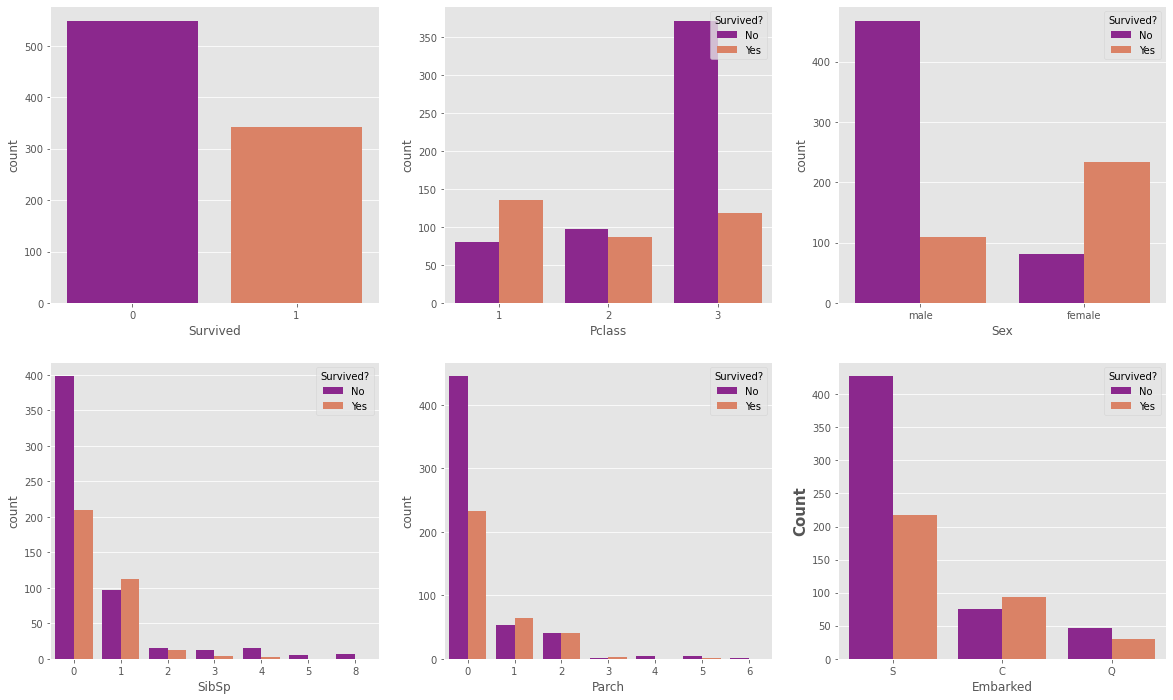

In [25]:
plotsurvival(cats, v_train)

In [26]:
def plot_3chart(df, feature):
    import matplotlib.gridspec as gridspec
    from matplotlib.ticker import MaxNLocator
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    # creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=ax1,
                 color='#e74c3c')
    ax1.legend(labels=['Normal', 'Actual'])

    # customizing the QQ_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Probability Plot')
    # Plotting the QQ_Plot.
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.suptitle(f'{feature}', fontsize=24)

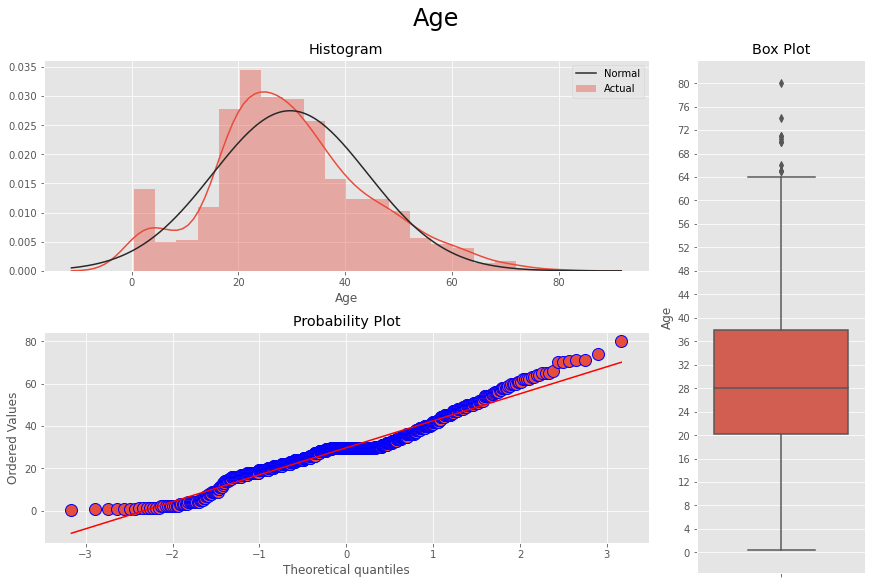

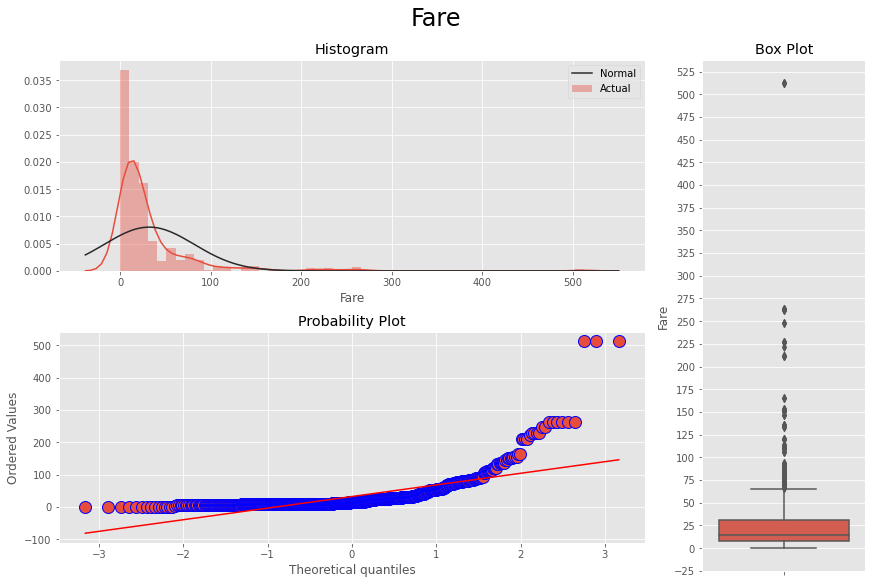

In [27]:
plot_3chart(v_train, 'Age')
plot_3chart(v_train, 'Fare')

It seems, fare and age has no strong linear relation with survival outcomes even with Spearman correlation. We're going to bin these variables to get better results...

In [28]:
# Listing most related continious values to target.
train_corr = v_train[['Survived', 'Age', 'Fare'
                      ]].corr(method='spearman').abs().unstack().sort_values(
                          kind='quicksort', ascending=False).reset_index()
train_corr.rename(columns={
    'level_0': 'Feature A',
    'level_1': 'Feature B',
    0: 'Correlation Coefficient'
},
                  inplace=True)
train_corr[(train_corr['Feature A'] == 'Survived')].style.background_gradient(
    cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
2,Survived,Survived,1.000000
4,Survived,Fare,0.323736
8,Survived,Age,0.052565


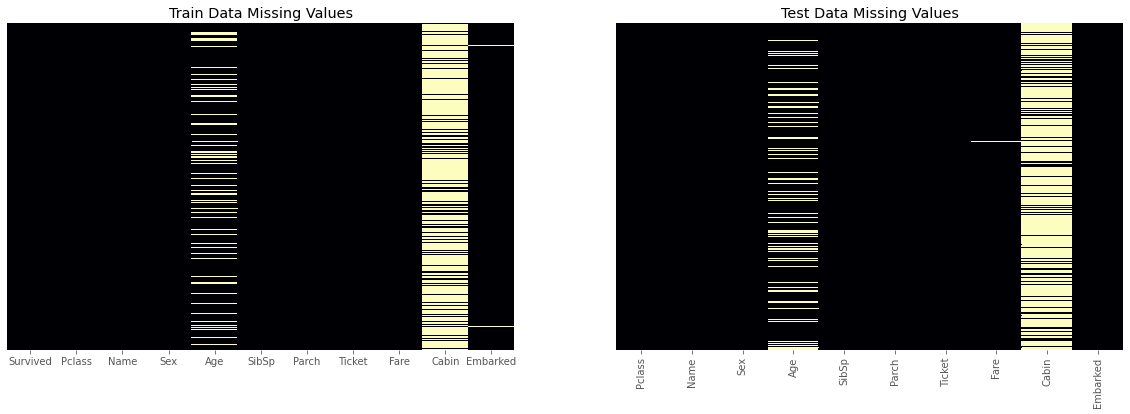

In [29]:
# Detecting missing data

fig, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.heatmap(v_train.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[0])
sns.heatmap(v_test.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[1])

ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')

plt.xticks(rotation=90)
plt.show()

In [30]:
def status(feature):
    print('Processing', feature, ': DONE')
    print(f'Shape after processing {combined.shape}')
    print('*' * 40)

In [32]:
def get_combined_data():
    # Reading train data
    train = pd.read_csv('../00 datasets/titanic_train.csv')

    # Reading test data
    test = pd.read_csv('../00 datasets/titanic_test.csv')

    # extracting the targets from the training data
    targets = train.Survived

    # Merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True, drop=True)
    
    return combined


In [33]:
def process_family():

    global combined
    # Introducing a new feature : The size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1

    # Introducing another feature based on the family size
    combined['Alone'] = combined['FamilySize'].map(lambda s: 1
                                                   if s == 1 else 0)

    # These two below are optional, it didn't help with the model...
    #combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    #combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

    status('Family')
    return combined

In [34]:
def family_survival():
    global combined

    # A function working on family survival rate using last names and ticket features

    # Extracting surnames
    combined['Last_Name'] = combined['Name'].apply(
        lambda x: str.split(x, ",")[0])

    # Adding new feature: 'Survived'
    default_survival_rate = 0.5
    combined['Family_Survival'] = default_survival_rate

    for grp, grp_df in combined[[
            'Survived', 'Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
            'SibSp', 'Parch', 'Age', 'Cabin'
    ]].groupby(['Last_Name', 'Fare']):

        if (len(grp_df) != 1):
            # A Family group is found.
            for ind, row in grp_df.iterrows():
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    combined.loc[combined['PassengerId'] ==
                                 passID, 'Family_Survival'] = 1
                elif (smin == 0.0):
                    combined.loc[combined['PassengerId'] ==
                                 passID, 'Family_Survival'] = 0

    for _, grp_df in combined.groupby('Ticket'):
        if (len(grp_df) != 1):
            for ind, row in grp_df.iterrows():
                if (row['Family_Survival'] == 0) | (
                        row['Family_Survival'] == 0.5):
                    smax = grp_df.drop(ind)['Survived'].max()
                    smin = grp_df.drop(ind)['Survived'].min()
                    passID = row['PassengerId']
                    if (smax == 1.0):
                        combined.loc[combined['PassengerId'] ==
                                     passID, 'Family_Survival'] = 1
                    elif (smin == 0.0):
                        combined.loc[combined['PassengerId'] ==
                                     passID, 'Family_Survival'] = 0

    status('FamilySurvival')
    return combined

In [35]:
def get_titles():

    title_dictionary = {
        'Capt': 'Dr/Clergy/Mil',
        'Col': 'Dr/Clergy/Mil',
        'Major': 'Dr/Clergy/Mil',
        'Jonkheer': 'Honorific',
        'Don': 'Honorific',
        'Dona': 'Honorific',
        'Sir': 'Honorific',
        'Dr': 'Dr/Clergy/Mil',
        'Rev': 'Dr/Clergy/Mil',
        'the Countess': 'Honorific',
        'Mme': 'Mrs',
        'Mlle': 'Miss',
        'Ms': 'Mrs',
        'Mr': 'Mr',
        'Mrs': 'Mrs',
        'Miss': 'Miss',
        'Master': 'Master',
        'Lady': 'Honorific'
    }

    # Extract the title from names
    combined['Title'] = combined['Name'].map(
        lambda name: name.split(',')[1].split('.')[0].strip())

    # Mapping titles
    combined['Title'] = combined.Title.map(title_dictionary)
    status('Title')
    return combined

In [36]:
def process_names():
    global combined
    # Cleaning the Name variable
    combined.drop('Name', axis=1, inplace=True)

    # Encoding names as dummy variables
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)

    # Removing the title variable after getting dummies
    combined.drop('Title', axis=1, inplace=True)

    status('names')
    return combined

In [37]:
def process_age():
    global combined
    # A function that fills the missing values of the Age variable
    combined['Age'] = combined.groupby(
        ['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
    status('Age')
    return combined

In [38]:
def age_binner():
    global combined
    # Ranging and grouping Ages
    #bins = [0, 2, 18, 35, 65, np.inf]
    names = ['less2', '2-18', '18-35', '35-65', '65plus']

    #combined['AgeBin'] = pd.cut(combined['Age'], bins, labels=names)
    combined['AgeBin'] = pd.qcut(combined['Age'],q = 5, labels = names)
    age_dummies = pd.get_dummies(combined['AgeBin'], prefix='AgeBin')
    combined = pd.concat([combined, age_dummies], axis=1)
    combined.drop('AgeBin', inplace=True, axis=1)
    combined.drop('Age', inplace=True, axis=1)
    status('Age Bins')
    return combined

In [39]:
def process_fares():
    global combined

    # Filling missing values in fare

    combined['Fare'] = combined.groupby(
        ['Pclass', 'Sex'])['Fare'].apply(lambda x: x.fillna(x.median()))
    status('fare')
    return combined

In [40]:
def process_fare_bin(onehot='None'):

    global combined
    # Ranging and grouping Fare using historical data
    bins = [-1, 7.91, 14.454, 31, 99, 250, np.inf]
    names = [0, 1, 2, 3, 4, 5]

    combined['FareBin'] = pd.cut(combined['Fare'], bins,
                                 labels=names).astype('int')
    if onehot == 'yes':
        farebin_dummies = pd.get_dummies(combined['FareBin'], prefix='FareBin')
        combined = pd.concat([combined, farebin_dummies], axis=1)
        combined.drop('FareBin', inplace=True, axis=1)
        combined.drop('Fare', inplace=True, axis=1)
    elif onehot == 'both':
        farebin_dummies = pd.get_dummies(combined['FareBin'], prefix='FareBin')
        combined = pd.concat([combined, farebin_dummies], axis=1)
        combined.drop('FareBin', inplace=True, axis=1)
    else:
        combined.drop('Fare', inplace=True, axis=1)

    status('FareBin')
    return combined

In [41]:
def scale_fare():

    # A definition for scaling fare values

    from scipy.stats import skew, boxcox_normmax, norm
    from scipy.special import boxcox1p
    global combined
    combined['Fare'] = boxcox1p(combined['Fare'],
                                boxcox_normmax(combined['Fare'] + 1))
    status('NFareBin')
    return combined

In [42]:
def process_embarked():
    global combined
    # Filling missing embarked values with the most frequent one
    combined.Embarked.fillna(combined.Embarked.mode()[0], inplace=True)
    # One hot encoding
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('Embarked')
    return combined

In [43]:
def process_cabin():
    global combined
    # Replacing missing cabins with M (for Missing)
    combined['Cabin_Informed'] = [
        1 if pd.notnull(cab) else 0 for cab in combined['Cabin']
    ]
    combined.Cabin.fillna('M', inplace=True)

    # Mapping each Cabin value with the cabin letter
    combined['Deck'] = combined['Cabin'].map(lambda c: c[0])

    combined['Deck'].replace('T', 'A', inplace=True)

    # One hot encoding ...
    cabin_dummies = pd.get_dummies(combined['Deck'], prefix='Deck')
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    combined.drop('Deck', axis=1, inplace=True)
    status('Cabin')
    return combined

In [44]:
def process_sex():
    global combined
    # Mapping string values with numerical ones
    combined['Sex'] = combined['Sex'].map({'male': 1, 'female': 0})
    status('Sex')
    return combined

In [45]:
def process_pclass():

    global combined
    # One hot encoding pclass into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix='Pclass')

    # Adding dummy variables to main set
    combined = pd.concat([combined, pclass_dummies], axis=1)

    # Removing redundant 'Pclass'
    combined.drop('Pclass', axis=1, inplace=True)

    status('Pclass')
    return combined

In [46]:
def process_ticket():

    global combined

    # A function that extracts each prefix of the ticket, returns 'Unknown' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.', '')
        ticket = ticket.replace('/', '')
        ticket = ticket.split()
        ticket = map(lambda t: t.strip(), ticket)
        ticket = list(filter(lambda t: not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else:
            return 'Unknown'

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

In [47]:
def dropper():
    global combined

    combined.drop('Cabin', axis=1, inplace=True)
    combined.drop('PassengerId', inplace=True, axis=1)
    combined.drop('Last_Name', inplace=True, axis=1)
    combined.drop('Survived', inplace=True, axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    return combined

In [48]:
# Executing definitions to process data
combined = get_combined_data()  # For merging train test data
combined = family_survival()  # For creating family survival feature
combined = process_family()  # For creating Family size feature
combined = get_titles()  # For extracting titles
combined = process_names()  # For one hot encoding titles
combined = process_age()  # For imputing missing age values
combined = age_binner()  # For grouping and hot encoding age ranges
combined = process_fares()  # For imputing fares
# For grouping and label encoding fares, can use 'both' for keeping age with dummies or yes for just one hot
combined = process_fare_bin(onehot='no')
# combined =scale_fare() # For scaling age values
combined = process_embarked()  # For imputing embarked and one hot encoding
# combined = process_cabin() # For extracting deck info from cabins
combined = process_sex()  # For label encoding sex
# combined = process_pclass() # For one hot encoding pclass
# combined = process_ticket() # For extracting ticket info
combined = dropper()  # For dropping not needed features
print(
    f'Processed everything. Missing values left: {combined.isna().sum().sum()}'
)

Processing FamilySurvival : DONE
Shape after processing (1309, 14)
****************************************
Processing Family : DONE
Shape after processing (1309, 16)
****************************************
Processing Title : DONE
Shape after processing (1309, 17)
****************************************
Processing names : DONE
Shape after processing (1309, 21)
****************************************
Processing Age : DONE
Shape after processing (1309, 21)
****************************************
Processing Age Bins : DONE
Shape after processing (1309, 25)
****************************************
Processing fare : DONE
Shape after processing (1309, 25)
****************************************
Processing FareBin : DONE
Shape after processing (1309, 25)
****************************************
Processing Embarked : DONE
Shape after processing (1309, 27)
****************************************
Processing Sex : DONE
Shape after processing (1309, 27)
**************************************

In [49]:
# Assigning engineered data to inspection variable.
v_merged = combined.copy()
v_merged['Survived'] = v_train['Survived']
v_merged.head()

,Pclass,Sex,SibSp,Parch,Family_Survival,FamilySize,Alone,Title_Dr/Clergy/Mil,Title_Honorific,Title_Master,Title_Miss,Title_Mr,Title_Mrs,AgeBin_less2,AgeBin_2-18,AgeBin_18-35,AgeBin_35-65,AgeBin_65plus,FareBin,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,1,0,0.5,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0.0
1,1,0,1,0,0.5,2,0,0,0,0,0,0,1,0,0,0,1,0,3,1,0,0,1.0
2,3,0,0,0,0.5,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1.0
3,1,0,1,0,0.0,2,0,0,0,0,0,0,1,0,0,0,1,0,3,0,0,1,1.0
4,3,1,0,0,0.5,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.0


In [50]:
v_merged.describe()

,Pclass,Sex,SibSp,Parch,Family_Survival,FamilySize,Alone,Title_Dr/Clergy/Mil,Title_Honorific,Title_Master,Title_Miss,Title_Mr,Title_Mrs,AgeBin_less2,AgeBin_2-18,AgeBin_18-35,AgeBin_35-65,AgeBin_65plus,FareBin,Embarked_C,Embarked_Q,Embarked_S,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,2.294882,0.644003,0.498854,0.385027,0.522918,1.883881,0.603514,0.017571,0.004584,0.046600,0.200153,0.578304,0.152788,0.221543,0.275783,0.108480,0.199389,0.194805,1.576012,0.206264,0.093965,0.699771,0.383838
std,0.837836,0.478997,1.041658,0.865560,0.322230,1.583639,0.489354,0.131435,0.067573,0.210862,0.400267,0.494019,0.359921,0.415444,0.447079,0.311104,0.399694,0.396202,1.265179,0.404777,0.291891,0.458533,0.486592
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000,0.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,1.000000,8.000000,9.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


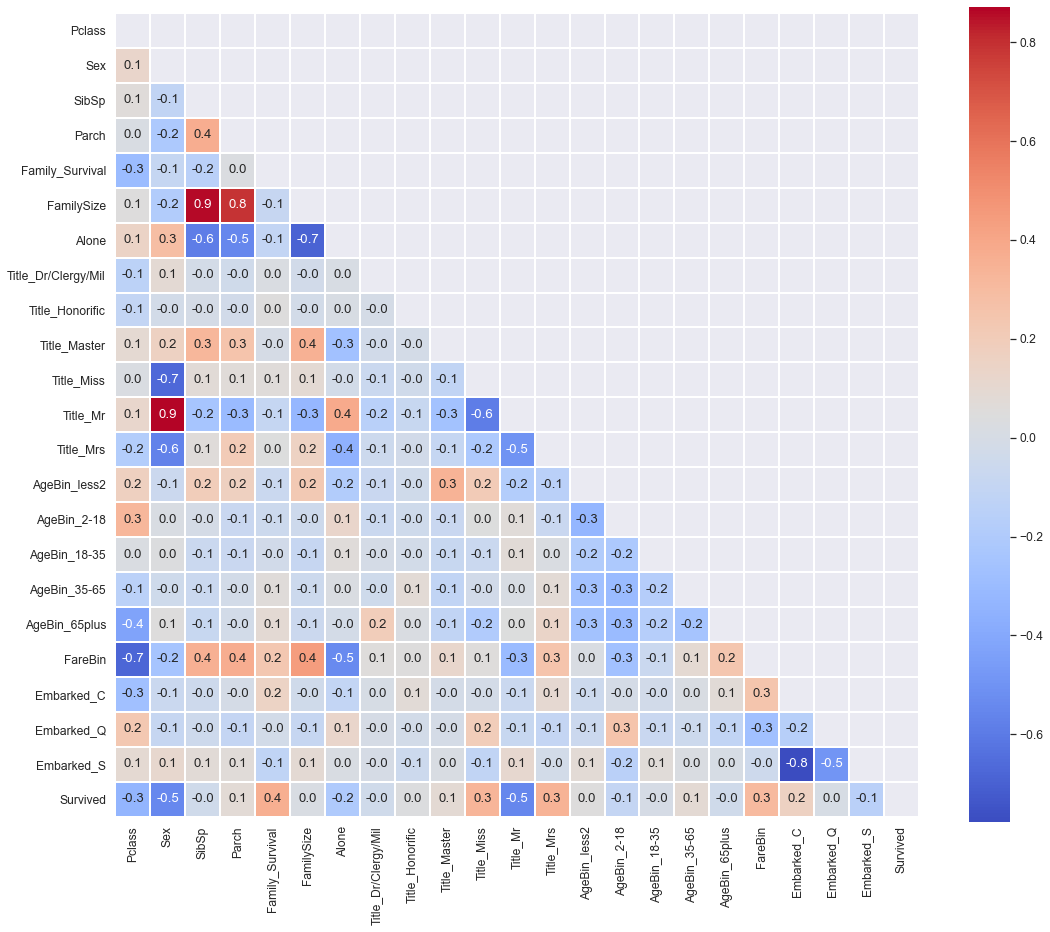

In [51]:
# Display numerical correlations between features on heatmap
sns.set(font_scale=1.1)
correlation_train = v_merged.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1)

plt.show()

[Come Back](https://www.kaggle.com/datafan07/titanic-eda-and-several-modelling-approaches#Modelling)